# 521153S Deep Learning assignment 3: Training CNN networks



## Outline
#### In this assignment, you will learn:
* Using a custom Pytorch dataset, and Splitting it to train, validation, and test subsets.
* Building a Simple Convolutional Neural Network (CNN) in Pytorch.
* Training and testing your CNN with Pytorch.

#### Tasks (<span style="color:green">10 points</span>)
* **Part 1.** Initializing the CIFAR-10 dataset and splitting it (<span style="color:green">3 points</span>)
    * 1.1. Initializing the dataset and splitting it (<span style="color:green">1 point</span>)
    * 1.2. Samples checking (<span style="color:green">1 point</span>)
    * 1.3. Iterating through the dataset with batches (<span style="color:green">1 point</span>)<br>
* **Part 2.** Build a CNN on your own. (<span style="color:green">3 points</span>) <br>
* **Part 3.** Train and test your CNN. (<span style="color:green">4 points</span>)
    * 3.1. Create functions for train and evaluation (<span style="color:green">2.5 points</span>) <br>
    * 3.2. Train and test your network (<span style="color:green">1.5 points</span>) <br>

#### Environment
Python 3, Numpy, matplotlib, torch, torchvision

#### Dataset
* [**CIFAR-10**](https://www.cs.toronto.edu/~kriz/cifar.html)
is a classic benchmark dataset in machine learning, especially for image classification tasks. It’s widely used to train and evaluate models that can recognize objects in images. It consists of 60,000 colored RGB images, each sized 32×32 pixels, divided into 10 distinct classes.

The dataset is initially divided into 50,000 training samples and 10,000 test samples. In this assignment, you'll retain the default test split and further partition the original training set into 45,000 samples for training and 5,000 for validation.

#### Hints
* To find the place where you have to insert your solution, hit Crtl + F and search for **TODO:** . You are not supposed to modify the codes from other parts.
* Be careful with the shapes of the tensors flowing through the CNN model, making all the operations have compatible inputs and outputs.

## Part 1. Initializing the CIFAR-10 dataset and splitting it (<span style="color:green">3 points</span>)

### Part 1.1. Initialize and Split the Dataset (<span style="color:green">1 point</span>)
Here we initialize and download the default CIFAR-10 training and test splits using the [CIFAR10](https://docs.pytorch.org/vision/main/generated/torchvision.datasets.CIFAR10.html) class then splitting the default training split into training and validation sets.

#### Note
One of the most important input parameters when initializing any dataset in pytorch is `transform`. It is often used for data augmentation and converting the images to tensor format, further illustrations of `transform` can be found in [https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#writing-custom-datasets-dataloaders-and-transforms](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#writing-custom-datasets-dataloaders-and-transforms).

In [1]:
! pip install torchsummary

In [2]:
# import necessary packages
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Subset, DataLoader
import torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torchvision import datasets
from torchsummary import summary

In [3]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# TODO: Initialize and download the full CIFAR-10 training split, set transform to transform (0.5 point)
# Hint: use datasets.CIFAR10()
full_trainset = datasets.CIFAR10(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

# TODO: Initialize and download the CIFAR-10 test split, set transform to transform (0.5 point)
# Hint: use datasets.CIFAR10()
test_set = datasets.CIFAR10(
    root="./data",
    train=False,
    download=True,
    transform=transform
)

# Splitting the full training set into training and validation splits
# Total number of samples
total_samples = len(full_trainset)  # 50,000

# Calculate split indices
train_end = int(0.9 * total_samples)  # 45,000
val_start = train_end                 # 45,000 to 50,000

# Create subsets
train_set = Subset(full_trainset, range(0, train_end))
val_set = Subset(full_trainset, range(val_start, total_samples))

100%|██████████| 170M/170M [00:03<00:00, 50.2MB/s]


### Part 1.2. Samples Checking (<span style="color:green">1 point</span>)
First, randomly show some images in training, validation and testing data and check its corresponding labels.<br>
Secondly, check the number of images for each class in each split.

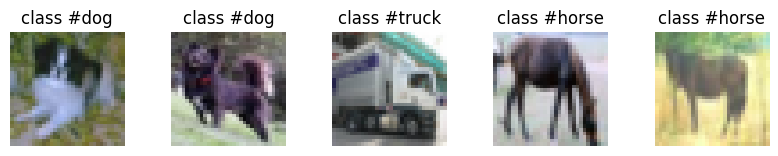

total number of training set: 45000
numer of images for class airplane: 4507
numer of images for class automobile: 4512
numer of images for class bird: 4521
numer of images for class cat: 4481
numer of images for class deer: 4525
numer of images for class dog: 4471
numer of images for class frog: 4512
numer of images for class horse: 4515
numer of images for class ship: 4468
numer of images for class truck: 4488


In [4]:
# checking training set
# randomly show some samples and their labels

# Define Classes order as indicated in the dataset description
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

num_to_show = 5
idx = np.random.choice(range(len(train_set)), num_to_show, replace=False) # randomly pick 5 pictures to show

fig = plt.figure(figsize=(8, 4))

for i in range(len(idx)):
    image, label = train_set[idx[i]]
    label_name = classes[label]

    ax = plt.subplot(1, num_to_show, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label_name))
    ax.axis('off')

    # Convert tensor to numpy image
    img = image / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

plt.show()

# print number of images for each class
print('total number of training set: {}'.format(len(train_set)))
train_targets = [full_trainset.targets[idx] for idx in train_set.indices]
for i in range(10):
    print('numer of images for class {}: {}'.format(classes[i], np.sum(np.array(train_targets) == i)))

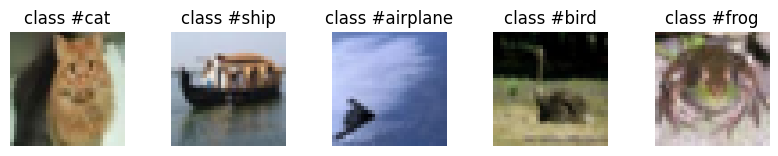

total number of validation set: 5000
number of images for class airplane: 493
number of images for class automobile: 488
number of images for class bird: 479
number of images for class cat: 519
number of images for class deer: 475
number of images for class dog: 529
number of images for class frog: 488
number of images for class horse: 485
number of images for class ship: 532
number of images for class truck: 512


In [7]:
# TODO:checking validation data (0.5 points)
# Hint:like the training set:show 5 images from validation set and  print number of images for each class

num_to_show = 5
idx = np.random.choice(range(len(val_set)), num_to_show, replace=False)

fig = plt.figure(figsize=(8, 4))

for i in range(len(idx)):
    image, label = val_set[idx[i]]
    label_name = classes[label]

    ax = plt.subplot(1, num_to_show, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label_name))
    ax.axis('off')

    # I Convert tensor to numpy image
    img = image / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

plt.show()

# I print number of images for each class in validation set
print('total number of validation set: {}'.format(len(val_set)))

val_targets = [full_trainset.targets[idx] for idx in val_set.indices]
for i in range(10):
    print('number of images for class {}: {}'.format(classes[i], np.sum(np.array(val_targets) == i)))

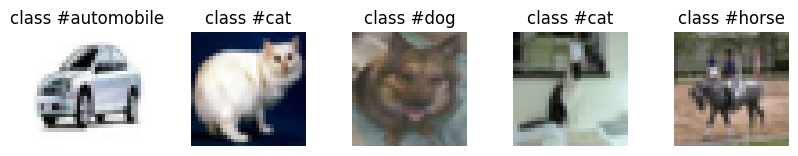

total number of test set: 10000
number of images for class airplane: 1000
number of images for class automobile: 1000
number of images for class bird: 1000
number of images for class cat: 1000
number of images for class deer: 1000
number of images for class dog: 1000
number of images for class frog: 1000
number of images for class horse: 1000
number of images for class ship: 1000
number of images for class truck: 1000


In [8]:
# TODO: checking testing data (0.5 points)
# Hint:like the training set:show 5 images from test set and  print number of images for each class

num_to_show = 5
idx = np.random.choice(range(len(test_set)), num_to_show, replace=False)

fig = plt.figure(figsize=(8, 4))

for i in range(len(idx)):
    image, label = test_set[idx[i]]
    label_name = classes[label]

    ax = plt.subplot(1, num_to_show, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label_name))
    ax.axis('off')

    # I Convert tensor to numpy image
    img = image / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

plt.show()

#I print number of images for each class in test set
print('total number of test set: {}'.format(len(test_set)))

# test_set.targets exists directly (unlike Subset)
test_targets = test_set.targets

for i in range(10):
    print('number of images for class {}: {}'.format(
        classes[i],
        np.sum(np.array(test_targets) == i)
    ))

### Part 1.3. Iterating through the dataset with batches (<span style="color:green">1 point</span>)
PyTorch’s DataLoader class(`torch.utils.data.DataLoader` ) helps feed data into a model during training efficiently . It automatically handles mini-batching, so we don’t have to slice data manually. It supports shuffling, which improves generalization, and parallel data loading, which prevents the GPU from waiting on slow I/O. It also neatly pairs inputs and labels as tensors, simplifying the training loop. Here, we add more features with the help of [DataLoader](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#iterating-through-the-dataset):
* Batching the data
* Shuffling the data
* Load the data in parallel using multiprocessing workers.

`torch.utils.data.DataLoader` is an iterator which provides all these features. Parameters used below should be clear.

The `DataLoader` takes as input an instance of any `Dataset` class like `CIFAR10` that we used in section 1.1.

In [9]:
# Set batch_size to 64, shuffling the training set. Number of workers here is set to 0. If your system is Linux,
# it is possible to try more workers to do multi-process parallel reading.
train_loader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=0)

# TODO: create test_loader and valid_loader, both with no shuffling (1 points)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False, num_workers=0)
valid_loader = DataLoader(val_set, batch_size=64, shuffle=False, num_workers=0)


## Part 2. Build a CNN network on your own (<span style="color:green">3 points</span>)
A Convolutional Neural Network (CNN) is built from a sequence of building blocks, each designed to progressively learn spatial and semantic features from images. A typical CNN architecture is composed of the following building blocks: Input image → [Convolutional layer + ReLU + Pooling layer] (repeated multiple times) → Flattening → Fully Connected layer(s) → Output layer (with Softmax activation for classification). In PyTorch, the building blocks of a CNN can be defined using the following functions: nn.Conv2d() for convolutional layers, nn.BatchNorm2d() for batch normalization layers, nn.ReLU() for non-linear activation functions, nn.MaxPool2d() for pooling layers, and nn.Linear() for fully connected layers. These layers are typically declared and initialized in the __init__() function of a custom nn.Module class, and then connected sequentially in the forward() function to define the flow of data through the network. We can define a SimpleCNN class as follows：

In [10]:
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()
        # building blocks defined here
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # fully connected layer
        self.fc = nn.Linear(16 * 16 * 16, num_classes)  # assuming input 3×32×32

    def forward(self, x):
        # connect the blocks sequentially
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # flatten
        x = self.fc(x)  # fully connected layer
        return x

# example usage
model = SimpleCNN(num_classes=10)
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
         MaxPool2d-4           [-1, 16, 16, 16]               0
            Linear-5                   [-1, 10]          40,970
Total params: 41,450
Trainable params: 41,450
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.41
Params size (MB): 0.16
Estimated Total Size (MB): 0.58
----------------------------------------------------------------


In this assignment, you need to define your own Network shown in the figure below, following the rule of thumb:
1. Define the layers in `__init__`.
2. Do the forward calculation in `forward`.
(**Conv**: convolutional layer, **BN**: Batch Normalization layer, **Max_pool**: max pooling layer, **FC**: fully connected layer ):
<!--![model.png](attachment:model.png)-->
<img src=https://i.postimg.cc/kMQVG7zN/Assignment-3-CNN-Arch.png width="800">

In [14]:
import torch
import torch.nn as nn

class Network(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        # TODO: define layers (1.5 points)
        # Hint:use nn.Conv2d() for convolutional layer, nn.BatchNorm2d() for Batch Normalization layer,nn.MaxPool2d() for max pooling layer, nn.Linear() for fully connected layer,nn.ReLU() for relu


        # Conv 1 block: 3 -> 8 channels
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=1)
        self.bn1   = nn.BatchNorm2d(8)
        self.relu1 = nn.ReLU()


        # Conv 2 block: 8 -> 16 channels
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
        self.bn2   = nn.BatchNorm2d(16)
        self.relu2 = nn.ReLU()


        # Max pool: 32x32 -> 16x16
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)


        # Conv 3 block: 16 -> 32 channels
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.bn3   = nn.BatchNorm2d(32)
        self.relu3 = nn.ReLU()


        # Conv 4 block: 32 -> 64 channels
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn4   = nn.BatchNorm2d(64)
        self.relu4 = nn.ReLU()


        # Max pool: 16x16 -> 8x8
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # fully connected layers: FC1 → ReLU → FC2
        # 64 feature maps of size 8x8 → 64*8*8 = 4096
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.relu_fc = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        # TODO: forward pass (1.5 points)

        x = self.relu1(self.bn1(self.conv1(x)))
        x = self.relu2(self.bn2(self.conv2(x)))
        x = self.pool1(x)

        x = self.relu3(self.bn3(self.conv3(x)))
        x = self.relu4(self.bn4(self.conv4(x)))
        x = self.pool2(x)

        x = x.view(x.size(0), -1)

        x = self.relu_fc(self.fc1(x))
        x = self.fc2(x)
        return x


In [15]:
model = Network(num_classes=10)
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             224
       BatchNorm2d-2            [-1, 8, 32, 32]              16
              ReLU-3            [-1, 8, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]           1,168
       BatchNorm2d-5           [-1, 16, 32, 32]              32
              ReLU-6           [-1, 16, 32, 32]               0
         MaxPool2d-7           [-1, 16, 16, 16]               0
            Conv2d-8           [-1, 32, 16, 16]           4,640
       BatchNorm2d-9           [-1, 32, 16, 16]              64
             ReLU-10           [-1, 32, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]          18,496
      BatchNorm2d-12           [-1, 64, 16, 16]             128
             ReLU-13           [-1, 64, 16, 16]               0
        MaxPool2d-14             [-1, 6

## Part 3. Train and test your CNN model (<span style="color:green">4 points</span>)


### Part 3.1. Create functions for train and evaluation (<span style="color:green">2.5 points</span>)
* Instantiate a network.
* When training, create an optimizer to take care of network's parameters, calculate the loss and accuracy.
* When evaluating, only the accuracy needs to be calculated

In [16]:
# device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# instantiate a network
net = Network(num_classes=10).to(device)

# evaluation function
@torch.no_grad()
def eval(net, data_loader):
    net.eval()
    correct = 0
    num_images = 0
    for i_batch, (images, labels) in enumerate(data_loader):
        images = images.to(device)
        labels = labels.to(device)

        outs = net(images)
        preds = outs.argmax(dim=1)

        correct += (preds == labels).sum().item()
        num_images += labels.size(0)

    acc = correct / num_images if num_images > 0 else 0.0
    return acc

# training function
def train(net, train_loader, valid_loader):
    criterion = nn.CrossEntropyLoss()

    # TODO: build your SGD optimizer with learning rate=0.01, momentum=0.9, no weight decay (0.5 points)
    # your code here
    optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0)

    net.to(device)

    epochs = 10
    best_acc_eval = 0.0
    best_model_state = None
    for epoch in range(epochs):
        net.train()
        correct = 0 # used to accumulate number of correctly recognized images
        num_images = 0 # used to accumulate number of images
        for i_batch, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)
            # TODO: rest of the training code
            # your code here, including the forward propagation (0.75 points),
            outs = net(images)
            loss = criterion(outs, labels)
            # backward propagation (0.75 points) and calculating the accuracy by counting correct and num_images (0.5 points)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # calculating the accuracy by counting correct and num_images
            preds = outs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            num_images += labels.size(0)

        acc = correct / num_images if num_images > 0 else 0.0
        acc_eval = eval(net, valid_loader)

        # Save best model
        if acc_eval > best_acc_eval:
          best_acc_eval = acc_eval
          best_model_state = net.state_dict()

        print('epoch: %d, lr: %f, accuracy: %f, loss: %f, valid accuracy: %f' % (epoch, optimizer.param_groups[0]['lr'], acc, loss.item(), acc_eval))

    net.load_state_dict(best_model_state)
    return net

Using device: cpu


### Part 3.2. Train and test your network (<span style="color:green">1.5 points</span>)

In [17]:
# This cell will run fastly if you use GPU

print('Please wait patiently, it may take some seconds...')
# TODO: train your network here (0.75 points)
# Hint: Use the train function you implemented previously
net = train(net, train_loader, valid_loader)

# TODO: test your network here on testing data (0.75 points)
# Hint: Use the eval function you implemented previously
acc_test = eval(net, test_loader)

print('accuracy on testing data: %f' % acc_test)

Please wait patiently, it may take some seconds...
epoch: 0, lr: 0.010000, accuracy: 0.516000, loss: 0.713071, valid accuracy: 0.594200
epoch: 1, lr: 0.010000, accuracy: 0.676089, loss: 0.647821, valid accuracy: 0.697800
epoch: 2, lr: 0.010000, accuracy: 0.736222, loss: 1.181980, valid accuracy: 0.738400
epoch: 3, lr: 0.010000, accuracy: 0.776422, loss: 1.341080, valid accuracy: 0.752200
epoch: 4, lr: 0.010000, accuracy: 0.811289, loss: 0.107811, valid accuracy: 0.740600
epoch: 5, lr: 0.010000, accuracy: 0.839111, loss: 0.374866, valid accuracy: 0.763200
epoch: 6, lr: 0.010000, accuracy: 0.865067, loss: 0.958325, valid accuracy: 0.760400
epoch: 7, lr: 0.010000, accuracy: 0.887556, loss: 0.274805, valid accuracy: 0.776200
epoch: 8, lr: 0.010000, accuracy: 0.911200, loss: 0.289851, valid accuracy: 0.752400
epoch: 9, lr: 0.010000, accuracy: 0.926733, loss: 0.109299, valid accuracy: 0.762800
accuracy on testing data: 0.756100
